In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Bayes theorem

$$
\begin{align*}
P(y|x) &= \frac{P(x|y) \cdot P(y)}{P(x)}
\end{align*}
$$

## Naive Bayes formula

$$
\begin{align*}
P(y|\bold{x}) &\propto P(\bold{x}|y) \cdot P(y) \\
&\propto P(x_1|y) \cdot P(x_2|y) \cdots P(x_n|y) \cdot P(y) \\
&\propto \log(P(x_1|y)) + \log(P(x_2|y)) + \cdots + \log(P(x_n|y)) + \log(P(y)) \\
&\propto \sum_{i=1}^{n} \log(P(x_i|y)) + \log(P(y))
\end{align*}
$$

## Gaussian conditional probability
$$
\begin{align*}
P(x_i|y) = \frac{1}{\sqrt{2 \pi \sigma_y^2}} \exp \left(- \frac{(x_i - \mu_y)^2}{2 \sigma_y^2} \right)
\end{align*}
$$

In [2]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        if len(y.shape) != 1:
            y = y.reshape(-1)
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.means = np.zeros((n_classes, n_features))
        self.vars = np.zeros((n_classes, n_features))
        self.class_priors = np.zeros(n_classes)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[idx] = X_c.mean(axis=0)
            self.vars[idx] = X_c.var(axis=0)
            self.class_priors[idx] = len(X_c) / len(X)

    def gaussian(self, x, mean, var):
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-1 * ((x - mean)**2 / (2 * var)))
    
    def _predict(self, x):

        predictions = []

        for i in range(len(self.classes)):
            prior = np.log(self.class_priors[i])
            conditional = np.sum(np.log(self.gaussian(x, self.means[i], self.vars[i])))
            prediction = prior + conditional
            predictions.append(prediction)

        predictions = np.array(predictions)
        best_index = np.argmax(predictions)
        return self.classes[best_index]

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
        

In [7]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

Accuracy: 1.0


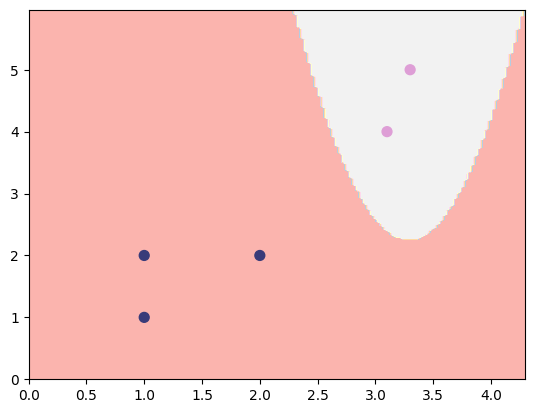

In [9]:
X = np.array([[1, 1],
              [1, 2],
              [2, 2],
              [3.3, 5],
              [3.1, 4]])

y = np.array([[0], [0], [0], [1], [1]])

model = NaiveBayes()
model.fit(X, y)
y_pred = model.predict(X)
print(f'Accuracy: {np.mean(y_pred == y.reshape(-1))}')
plot_2d_clf_problem(X, y, model.predict)

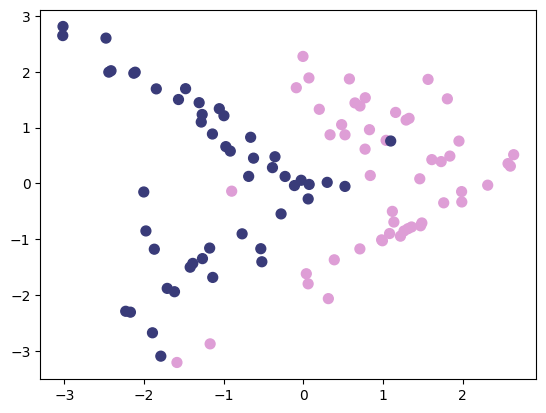

In [16]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_classes=2, n_redundant=0, n_features=2, n_informative=2)
plot_2d_clf_problem(X, y)

Accuracy: 0.89


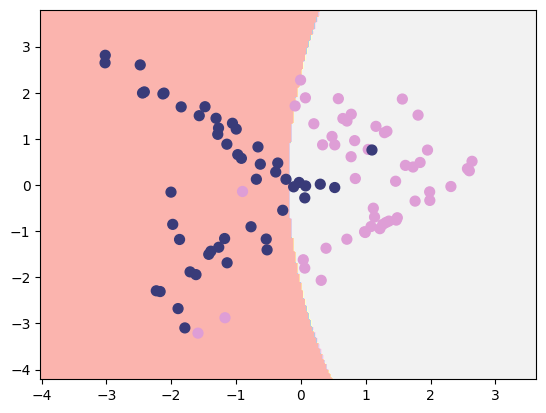

In [17]:
model.fit(X, y)
y_pred = model.predict(X)
print(f'Accuracy: {np.mean(y_pred == y)}')
plot_2d_clf_problem(X, y, model.predict)